In [225]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, PassiveAggressiveRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, 
    BaggingRegressor
)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,root_mean_squared_error


#custom import
from classification import *
from classify_visualize import * 
from Preprocessing import *




In [226]:
data = pd.read_csv(r"E:\ZeroCodeML\hospital_readmissions.csv")
target_column = "readmitted"
model_name = "logistic_regression"
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [227]:
data.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [228]:
# data['Index'] = data['Index'].map({0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f'}) 

In [229]:
# data.to_csv(r"E:\ZeroCodeML\bmi.csv")

In [230]:
summary = df_summary(data)
print(summary)

               Column  dtypes  Missing (%)  Uniques (%)
0                 age  object          0.0        0.024
1    time_in_hospital   int64          0.0        0.056
2    n_lab_procedures   int64          0.0        0.436
3        n_procedures   int64          0.0        0.028
4       n_medications   int64          0.0        0.280
5        n_outpatient   int64          0.0        0.092
6         n_inpatient   int64          0.0        0.064
7         n_emergency   int64          0.0        0.084
8   medical_specialty  object          0.0        0.028
9              diag_1  object          0.0        0.032
10             diag_2  object          0.0        0.032
11             diag_3  object          0.0        0.032
12       glucose_test  object          0.0        0.012
13            A1Ctest  object          0.0        0.012
14             change  object          0.0        0.008
15       diabetes_med  object          0.0        0.008
16         readmitted  object          0.0      

In [231]:
df, encoder, scaler, dropped_columns = preprocess_data(data, 40)

In [232]:

X_train, X_test, y_train, y_test = split_data_supervised(df, target_column, split_ratio=70)

In [233]:
summary = df_summary(df)
print(summary)

               Column   dtypes  Missing (%)  Uniques (%)
0                 age  float64          0.0        0.024
1    time_in_hospital  float64          0.0        0.056
2    n_lab_procedures  float64          0.0        0.436
3        n_procedures  float64          0.0        0.028
4       n_medications  float64          0.0        0.280
5        n_outpatient  float64          0.0        0.092
6         n_inpatient  float64          0.0        0.064
7         n_emergency  float64          0.0        0.084
8   medical_specialty  float64          0.0        0.028
9              diag_1  float64          0.0        0.032
10             diag_2  float64          0.0        0.032
11             diag_3  float64          0.0        0.032
12       glucose_test  float64          0.0        0.012
13            A1Ctest  float64          0.0        0.012
14             change  float64          0.0        0.008
15       diabetes_med  float64          0.0        0.008
16         readmitted  float64 

In [234]:
y_train.head()

12486    1.0
107      0.0
485      1.0
13898    1.0
12286    0.0
Name: readmitted, dtype: float64

In [235]:
y_train.unique()

array([1., 0.])

In [236]:

model, metrics,y_pred = train_classification_model(model_name, X_train, X_test, y_train, y_test)

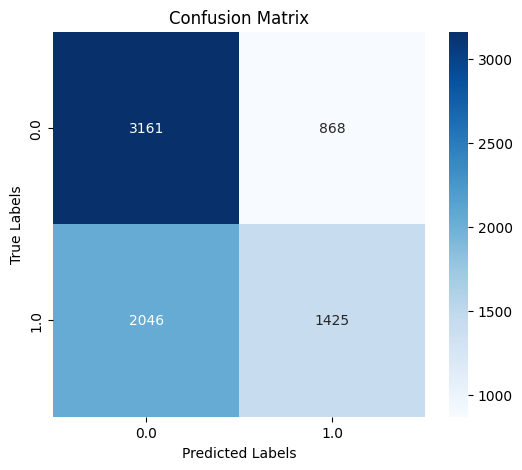

In [237]:
plot_confusion_matrix(y_test, y_pred)

In [238]:
conm = confusion_matrix(y_test, y_pred)
class_name = np.unique(y_test) 

In [239]:
print(cm)
print(class_names)

[[0, 0, 5, 0, 0, 0], [0, 0, 11, 0, 0, 0], [0, 0, 14, 2, 0, 0], [0, 0, 3, 11, 5, 0], [0, 0, 0, 0, 34, 2], [0, 0, 0, 0, 2, 61]]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


In [240]:
cm =[]

cmHighValue = 0
cmLowValue = 0
for i in conm:
    mat = []
    for j in i:
        if j > cmHighValue:
            cmHighValue = j
        if j < cmLowValue:
            cmLowValue = j    
        mat.append(j)
    cm.append(mat)


print(cmHighValue, cmLowValue)

3161 0


In [241]:
class_names =[]
for i in class_name:
    class_names.append(i)

print(class_names)

[0.0, 1.0]


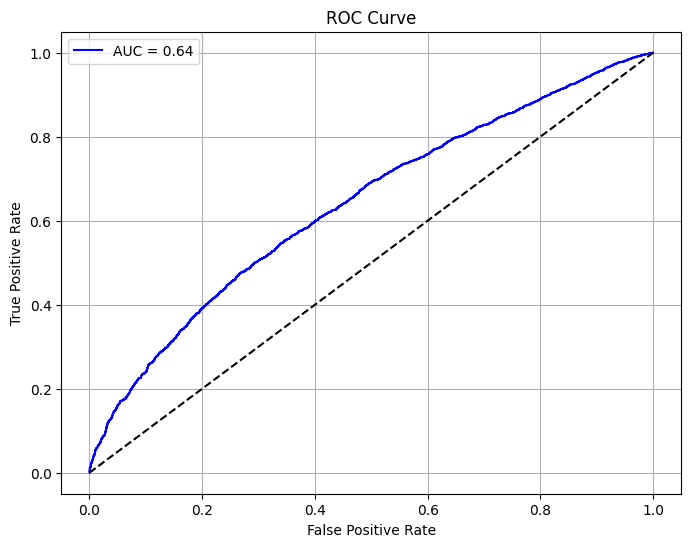

In [242]:
plot_roc_curve(model,X_test,y_test)

0.6390459002253828
0.6390459002253827


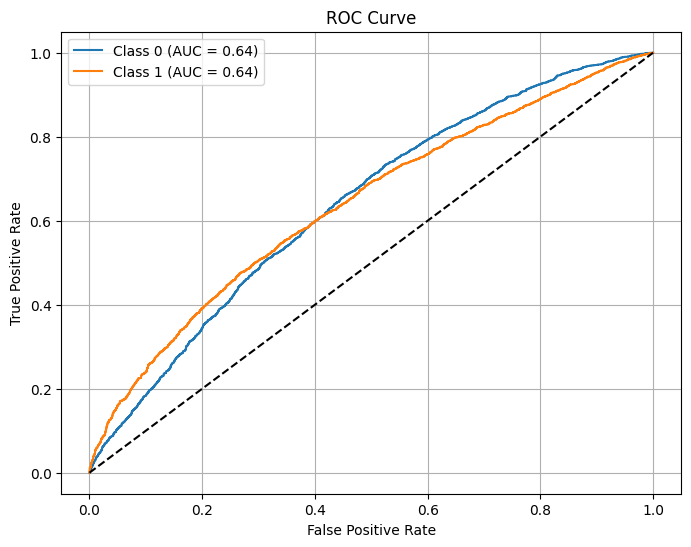

[{'name': 'Class 0 (AUC = 0.64)', 'fpr': [0.0, 0.0, 0.0, 0.0002881014116969173, 0.0002881014116969173, 0.000864304235090752, 0.000864304235090752, 0.0011524056467876692, 0.0011524056467876692, 0.0014405070584845865, 0.0014405070584845865, 0.001728608470181504, 0.001728608470181504, 0.002016709881878421, 0.002016709881878421, 0.0025929127052722557, 0.0025929127052722557, 0.002881014116969173, 0.002881014116969173, 0.0031691155286660906, 0.0031691155286660906, 0.003457216940363008, 0.003457216940363008, 0.004033419763756842, 0.004033419763756842, 0.004897723998847595, 0.004897723998847595, 0.005185825410544511, 0.005185825410544511, 0.005473926822241429, 0.005473926822241429, 0.005762028233938346, 0.005762028233938346, 0.006050129645635264, 0.006050129645635264, 0.006338231057332181, 0.006338231057332181, 0.006626332469029098, 0.006626332469029098, 0.006914433880726016, 0.006914433880726016, 0.007202535292422933, 0.007202535292422933, 0.007778738115816767, 0.007778738115816767, 0.0080668

In [243]:
y_probs = model.predict_proba(X_test)
n_classes = len(model.classes_)
"""Plots Precision-Recall curve for binary and multi-class classification."""
plt.figure(figsize=(8, 6))

# if n_classes == 2:
#     precision, recall, _ = precision_recall_curve(y_test, y_probs[:, 1])
#     plt.plot(recall, precision, color="purple", label="Binary PR Curve")
# else:

rocPlot = []

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_probs[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    rocPlot.append({"name": f"Class {i} (AUC = {roc_auc:.2f})","fpr":list(fpr),"tpr":list(tpr)})
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

print(rocPlot)

In [244]:
for i in rocPlot:
    print(i['name'])

Class 0 (AUC = 0.64)
Class 1 (AUC = 0.64)


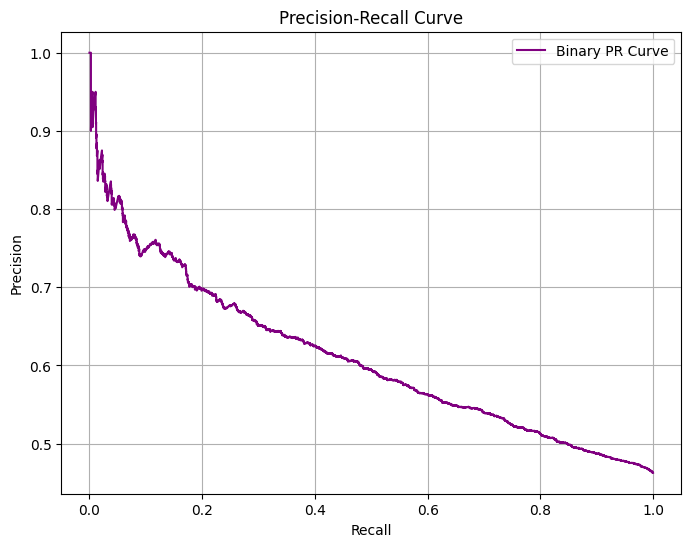

In [245]:
plot_precision_recall_curve(model,X_test,y_test)

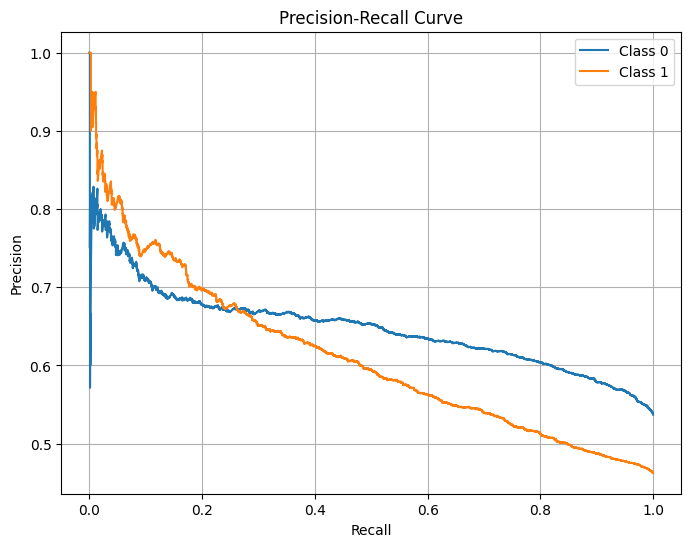

[{'name': 'Class 0', 'precision': [0.5372, 0.5372716362181624, 0.5373432915444118, 0.5374149659863946, 0.5374866595517609, 0.5375583722481655, 0.5376301040832666, 0.5377018550647271, 0.5377736252002135, 0.5378454144973969, 0.5377837116154873, 0.5378555214314328, 0.5379273504273504, 0.5379991986109256, 0.5380710659898477, 0.5381429525718103, 0.538214858364511, 0.5382867833756515, 0.5383587276129377, 0.5384306910840797, 0.5385026737967914, 0.5384409680438561, 0.5385129713827227, 0.5385849939815434, 0.5386570358480471, 0.5387290969899665, 0.5388011774150389, 0.538873277131005, 0.5389453961456103, 0.5390175344666042, 0.5390896921017403, 0.5391618690587763, 0.539234065345474, 0.5393062809695995, 0.5393785159389232, 0.539450770261219, 0.5395230439442658, 0.5395953369958462, 0.539667649423747, 0.5397399812357593, 0.5398123324396783, 0.5397506368145865, 0.5398230088495575, 0.5398954002950248, 0.5398336909871244, 0.539906103286385, 0.5398443788569895, 0.5399168120220046, 0.5399892646269457, 0.5

In [251]:
y_probs = model.predict_proba(X_test)
n_classes = len(model.classes_)
"""Plots Precision-Recall curve for binary and multi-class classification."""
plt.figure(figsize=(8, 6))

prCurve = []

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test, y_probs[:, i], pos_label=i)
    prCurve.append({"name": f"Class {i}","precision":list(precision),"recall":list(recall)})
    plt.plot(recall, precision, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()


print(prCurve)

In [246]:
plot_feature_importance(model, X_train)

Feature importance not available for this model.
